In [2]:
import pandas as pd

In [4]:
housing = pd.read_csv(r"C:/Users/HP 840 G3/Downloads/BostonHousing.csv")
housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [8]:
numerical_cols = housing.select_dtypes(include=['int','float']).columns.tolist()
numerical_cols

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'b',
 'lstat',
 'medv']

array([[<Axes: title={'center': 'crim'}>, <Axes: title={'center': 'zn'}>,
        <Axes: title={'center': 'indus'}>,
        <Axes: title={'center': 'chas'}>],
       [<Axes: title={'center': 'nox'}>, <Axes: title={'center': 'rm'}>,
        <Axes: title={'center': 'age'}>, <Axes: title={'center': 'dis'}>],
       [<Axes: title={'center': 'rad'}>, <Axes: title={'center': 'tax'}>,
        <Axes: title={'center': 'ptratio'}>,
        <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'lstat'}>,
        <Axes: title={'center': 'medv'}>, <Axes: >, <Axes: >]],
      dtype=object)

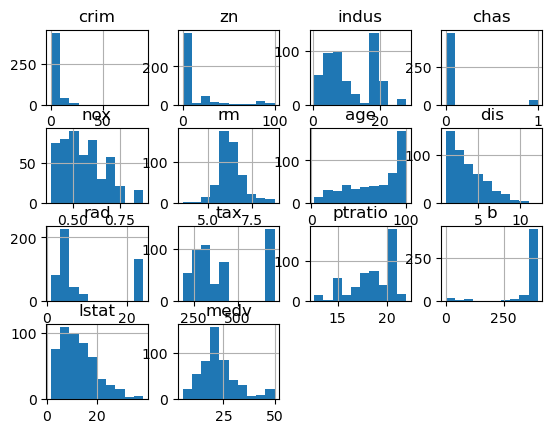

In [10]:
housing[numerical_cols].hist()

In [16]:
corr_matrix = housing.corr()
corr_matrix['medv'].sort_values(ascending=True)

lstat     -0.737663
ptratio   -0.507787
indus     -0.483725
tax       -0.468536
nox       -0.427321
crim      -0.388305
rad       -0.381626
age       -0.376955
chas       0.175260
dis        0.249929
b          0.333461
zn         0.360445
rm         0.696169
medv       1.000000
Name: medv, dtype: float64

In [18]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [20]:
median = housing['rm'].median()
housing.fillna({'rm':median}, inplace=True)
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_housing = scaler.fit_transform(housing[numerical_cols])
scaled_housing

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        1.00000000e+00, 8.96799117e-02, 4.22222222e-01],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        1.00000000e+00, 2.04470199e-01, 3.68888889e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        9.89737254e-01, 6.34657837e-02, 6.60000000e-01],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        1.00000000e+00, 1.07891832e-01, 4.20000000e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        9.91300620e-01, 1.31070640e-01, 3.77777778e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        1.00000000e+00, 1.69701987e-01, 1.53333333e-01]])

In [23]:
housing = pd.DataFrame(scaled_housing,columns=['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','b','lstat','medv'])
housing

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095,0.386667
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815,0.346667
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892,0.420000
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071,0.377778


In [24]:
corr_matrix = housing.corr()
housing['medv'].sort_values(ascending=False)

283    1.000000
225    1.000000
369    1.000000
370    1.000000
371    1.000000
         ...   
414    0.044444
399    0.028889
400    0.013333
398    0.000000
405    0.000000
Name: medv, Length: 506, dtype: float64

In [28]:
X = housing[['rm','zn']]
y = housing['medv']

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [32]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train,y_train)

y_pred = linear.predict(X_test)
#y_true = housing.loc['medv']
y_pred

array([ 0.40247573,  0.51451362,  0.31672711,  0.33296588,  0.37890971,
        0.3753451 ,  0.30306278,  0.35455156,  0.36544342,  0.3254406 ,
        0.31039003,  0.3347328 ,  0.02680569,  0.36603752,  0.26226783,
        0.51416677,  0.2961316 ,  0.09829587,  0.78002766,  0.35672993,
        0.38977696,  0.4598563 ,  0.263258  ,  0.43752771,  0.32128189,
        0.20662034,  0.29514143,  0.46426226,  0.31217233,  0.27929873,
        0.23533524,  0.40445607,  0.58011201,  0.19374815,  0.32068779,
        0.26246586,  0.55476369,  0.29415126,  0.33276785,  0.36861196,
        0.19929309,  0.52478038,  0.82813141,  0.25353896,  0.40267376,
        0.263258  ,  0.26088159,  0.40267376,  0.35316532,  0.45390275,
        0.33572297,  0.53394553,  0.34821448,  0.47475805,  0.63335848,
        0.38188022,  0.36346308,  0.57922143,  0.39712882,  0.26624104,
        0.38897867,  0.66713612,  0.42940832,  0.21236332,  0.50122074,
        0.19018354,  0.41336759,  0.40759384,  0.52100566,  0.31

In [34]:
#import numpy as np
#y_true = housing.medv.iloc[0]
#ash =np.array([y_true])

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error:",mse)

Mean Squared Error: 0.020724693675249765


In [38]:
mae = mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:",mae)

Mean Absolute Error: 0.0939476122831707


In [34]:
rsme = mean_squared_error(y_test,y_pred, squared=False)
print("Room Mean Squared Error:",rsme)

Room Mean Squared Error: 0.14396073657511538


C:\Users\HP 840 G3\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [36]:
print("Congratulations Professor Anthony, you have just re-learned and re-understood linear_regression")

Congratulations Professor Anthony, you have just re-learned and re-understood linear_regression


In [40]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(linear,X_train,y_train,cv=kf,scoring='neg_mean_squared_error')

In [42]:
mse_scores = -cv_scores
print("Cross Validation MSE scores on training data:",mse_scores)
print("Average MSE on the training data:",mse_scores.mean())

Cross Validation MSE scores on training data: [0.02243419 0.01793146 0.0281537  0.01771369 0.01807959]
Average MSE on the training data: 0.020862525650865077


In [44]:
linear.fit(X_train,y_train)

LinearRegression()

In [46]:
y_pred = linear.predict(X_test)
test_mse = mean_squared_error(y_test,y_pred)
print("MSE on test data:",test_mse)

MSE on test data: 0.020724693675249765
